(1.7, -3.0, -58)


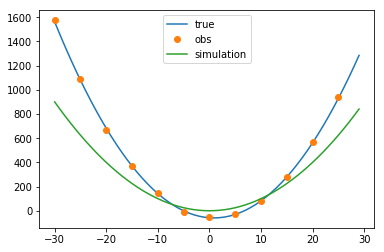

In [173]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# true
paramt = 1.7, -3.0, -58

x = np.arange(-30,30)
f = lambda x, (a, b, c): a * x**2 + b * x + c
yt = f(x, paramt)


# obs
np.random.seed(10)
xobs = x[::5]
yobs = yt[::5] + np.random.normal(0., 10., len(xobs))


# simulation
params = 1, 0, 0
ys = f(x, params)



def plot(param=None, ax=None):
    
    if ax is None:
        print paramt
        plt.figure()
        plt.plot(x, yt, label='true')
        plt.plot(xobs, yobs, 'o', label='obs')
        plt.plot(x, ys, label='simulation')
    
    if param is not None:
        y = f(x, param)
        print param, g.cost(y[::5])
        plt.plot(x, y, label='DA')
        
    plt.legend()
    return plt.gca()
    
plot()

(1.7, -3.0, -58)
[  1.71610439  -2.8834508  -60.74525699] 0.522164220463
(1.7, -3.0, -58)
[  1.71610439  -2.8834508  -60.74525699] 0.522164220463


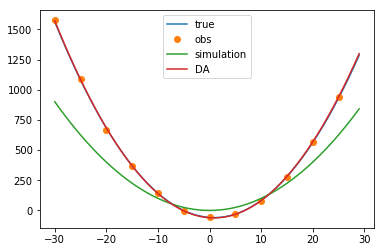

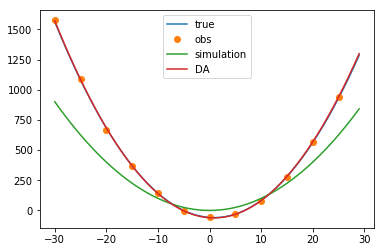

In [175]:
from green_function import GreenFunction

param0 = 1., -1., -10.
eparam = np.array([0.2, -0.2, -2.])

# default simulation
state0 = f(x, param0)[::5]

# define
g = GreenFunction(param0=param0,
                  state0=state0,
                  obs=yobs,
                  obs_error=30.,
                  back_error=eparam)

# additional simulation
params = g.get_ini_params()
for p in params:
    state = f(x, p)[::5]
    g.append(p, state)

# 1st optimization by least square
param_opt = g.solve_ls()
plot(param_opt)

# update simulation for next loop
state = f(x, param_opt)[::5]
g.update(param_opt, state)

# 2nd optimization
param_opt = g.solve_ls()
plot(param_opt)

In [165]:
g.params - g.param_b

array([[ -0.54831317,   1.6503524 ,  56.23577096],
       [ -0.74831317,   1.4503524 ,  56.23577096],
       [ -0.74831317,   1.6503524 ,  54.23577096],
       [ -0.74831317,   1.6503524 ,  56.23577096]])

first estimate
(1.7, -3.0, -58)
[  1.66490841  -1.48926933 -12.99615509] 29.3514816272
second estimate
[  1.66490841  -1.48926933 -12.99615509] 29.3514816272
third or more times estimate
[  1.66860267  -1.84675555 -15.88744226] 24.0693006096
third or more times estimate
[  1.66860267  -1.84675555 -15.88744226] 24.0693006096
third or more times estimate
[  1.66993194  -2.11194585 -18.58330168] 20.5608998219
third or more times estimate
[  1.66993194  -2.11194585 -18.58330168] 20.5608998219
third or more times estimate
[  1.67185317  -2.30796739 -21.1054361 ] 18.094027368
third or more times estimate
[  1.67185317  -2.30796739 -21.1054361 ] 18.094027368
third or more times estimate
[  1.67418398  -2.45216359 -23.47192538] 16.2633965758
third or more times estimate
[  1.67418398  -2.45216359 -23.47192538] 16.2633965758


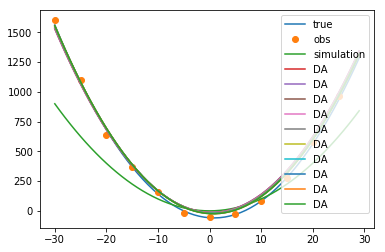

In [98]:
g.reset(param0, f(x, param0)[::5])
for p in g.get_ini_params():
    g.set(p, f(x, p)[::5])

ax = None
for i in range(10):
    param = g.solve_ridge()
    g.set(param, f(x, param)[::5])
    ax = plot(param, ax=ax)

array([  1.81921118,  -6.87219183, -34.5088288 ])

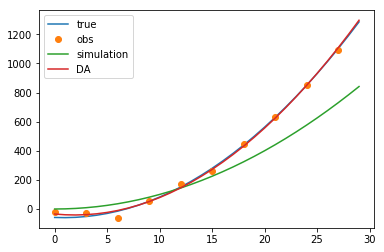

In [23]:
a, b, c = param

g = GreenFunction(param0=param,
                  state0=f(x, a, b, c)[::3],
                  obs=yobs,
                  obs_error=30.,
                  back_error=0.1,
                  convert=None)

g.set_values([a*1.1, b, c], f(x, a*1.1, b, c)[::3])
g.set_values([a, b*1.1, c], f(x, a, b*1.1, c)[::3])
g.set_values([a, b, c*1.1], f(x, a, b, c*1.1)[::3])

param = g.solve_ls()
plot(param)

param

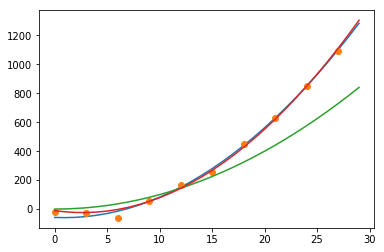

In [107]:
def plot(param):
    a, b, c = param
    ys1 = f(x, a, b, c)

    plt.plot(x, yt)
    plt.plot(xobs, yobs, 'o')
    plt.plot(x, ys)
    plt.plot(x, ys1)
    
plot(param)